In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"semanur111","key":"4033ceb5ce0f6390893eb49efe24af13"}'}

In [2]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2418        118  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1509         47  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          15057        484  1.0              
datascientistanna/customers-dataset          

In [3]:
!kaggle datasets download -d mirichoi0218/insurance
!unzip insurance.zip -d data ; rm insurance.zip

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 15.8MB/s]
Archive:  insurance.zip
  inflating: data/insurance.csv      


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sc

In [49]:
data = pd.read_csv("/content/data/insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Keşifsel Veri Analizi**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: ylabel='Density'>

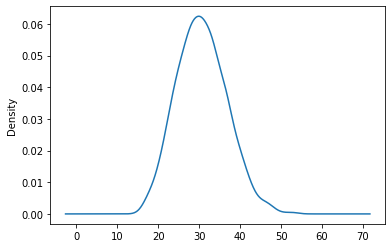

In [51]:
data['bmi'].plot(kind='kde')

<Axes: xlabel='smoker', ylabel='charges'>

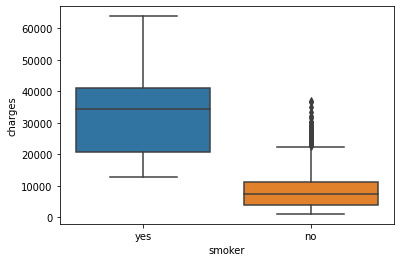

In [52]:
sns.boxplot(x="smoker",y="charges",data=data)

<Axes: xlabel='smoker', ylabel='count'>

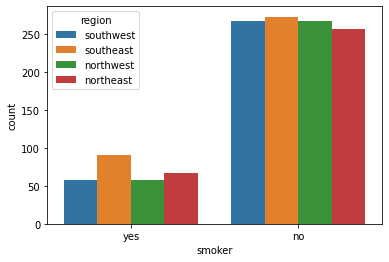

In [53]:
sns.countplot(x="smoker", hue="region", data=data)

<Axes: xlabel='sex', ylabel='bmi'>

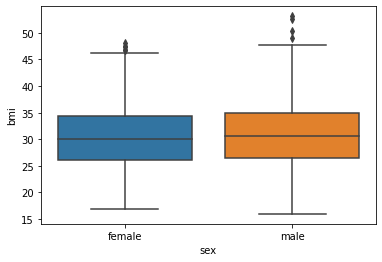

In [54]:
sns.boxplot(x="sex", y="bmi",data=data)

In [55]:
data.groupby('region')['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

<Axes: xlabel='age', ylabel='bmi'>

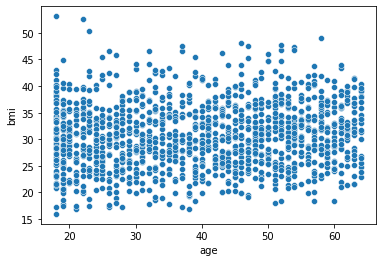

In [56]:
sns.scatterplot(x='age', y='bmi', data=data)

<Axes: xlabel='children', ylabel='bmi'>

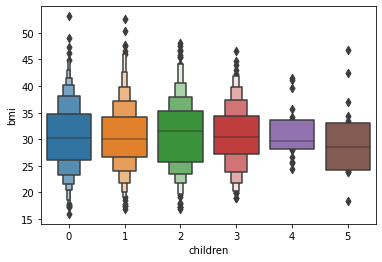

In [57]:
sns.boxenplot(x="children",y="bmi",data=data)

<Axes: xlabel='bmi', ylabel='charges'>

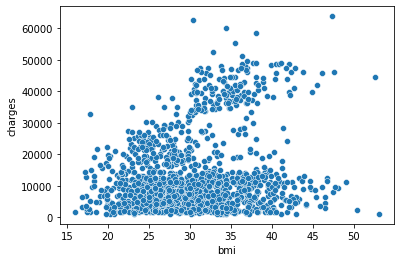

In [58]:
sns.scatterplot(x="bmi",y="charges",data=data)

<Axes: xlabel='smoker', ylabel='bmi'>

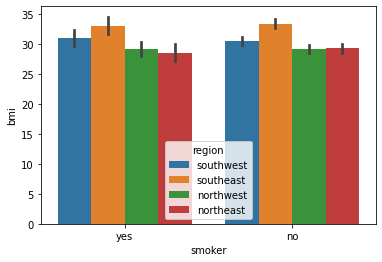

In [59]:
sns.barplot(x="smoker", y="bmi", hue="region",data=data)

# **Outlier Giderme**

<Axes: xlabel='bmi'>

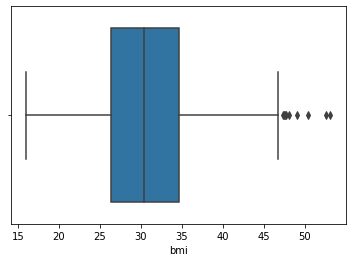

In [60]:
sns.boxplot(x="bmi",data=data)

In [61]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print("lower bound: ", lower_bound, "\tupper bound: ", upper_bound)
outliers_vector = (data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)
outliers = data['bmi'][outliers_vector]
outliers.index

lower bound:  13.7 	upper bound:  47.290000000000006


Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

In [62]:
data['bmi'][outliers_vector] = data['bmi'].mean()

<ipython-input-62-67f3cec5854f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'][outliers_vector] = data['bmi'].mean()


<Axes: xlabel='bmi'>

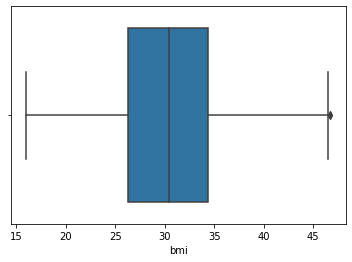

In [63]:
sns.boxplot(x="bmi",data=data)

<Axes: xlabel='charges'>

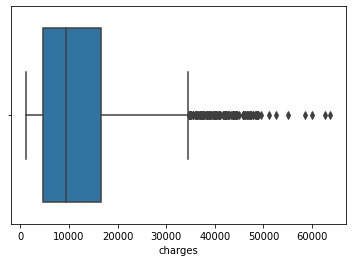

In [64]:
sns.boxplot(x="charges",data=data)

In [65]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print("lower bound: ", lower_bound, "\tupper bound: ", upper_bound)
outliers_vector = (data['charges'] < lower_bound) | (data['charges'] > upper_bound)
outliers = data['charges'][outliers_vector]
outliers.index

lower bound:  -13109.1508975 	upper bound:  34489.350562499996


Int64Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
            ...
            1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323],
           dtype='int64', length=139)

In [66]:
data['charges'][outliers_vector] = data['charges'].mean()

<ipython-input-66-0aa8cb9b89d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['charges'][outliers_vector] = data['charges'].mean()


<Axes: xlabel='charges'>

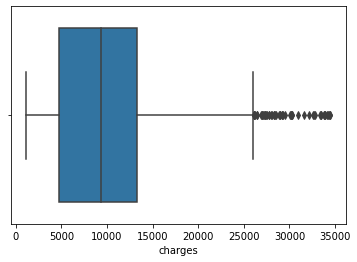

In [67]:
sns.boxplot(x="charges",data=data)

# **Preprocess**

In [68]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
sex = data.iloc[:,1:2].values
sex[:,0] = le.fit_transform(data.iloc[:,1:2])

children = data.iloc[:, 3:4].values
children[:,0] = le.fit_transform(data.iloc[:, 3:4])

smoker = data.iloc[:, 4:5].values
smoker[:, 0] = le.fit_transform(data.iloc[:, 4:5])

region = data.iloc[:, 5:6].values
region[:, 0] = le.fit_transform(data.iloc[:, 5:6])

ohe = preprocessing.OneHotEncoder()
region = ohe.fit_transform(region).toarray()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [69]:
sex = pd.DataFrame(data=sex, index=range(len(sex)), columns=['sex'])
children = pd.DataFrame(data=children, index=range(len(children)), columns=['children'])
smoker = pd.DataFrame(data=smoker, index=range(len(smoker)), columns=['smoker'])
region = pd.DataFrame(data=region, index=range(len(region)), columns=['nw', 'ne', 'sw', 'se'])

new_data = pd.concat([data['charges'], data['age'], data['bmi'], sex, children, smoker, region], axis=1)
new_data

,charges,age,bmi,sex,children,smoker,nw,ne,sw,se
0,16884.92400,19,27.900,0,0,1,0.0,0.0,0.0,1.0
1,1725.55230,18,33.770,1,1,0,0.0,0.0,1.0,0.0
2,4449.46200,28,33.000,1,3,0,0.0,0.0,1.0,0.0
3,21984.47061,33,22.705,1,0,0,0.0,1.0,0.0,0.0
4,3866.85520,32,28.880,1,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,10600.54830,50,30.970,1,3,0,0.0,1.0,0.0,0.0
1334,2205.98080,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,1629.83350,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,2007.94500,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [70]:
from sklearn import preprocessing
new_data.iloc[:,0:3]= preprocessing.normalize(new_data.iloc[:,0:3])
new_data

,charges,age,bmi,sex,children,smoker,nw,ne,sw,se
0,0.999998,0.001125,0.001652,0,0,1,0.0,0.0,0.0,1.0
1,0.999754,0.010429,0.019566,1,1,0,0.0,0.0,1.0,0.0
2,0.999953,0.006293,0.007416,1,3,0,0.0,0.0,1.0,0.0
3,0.999998,0.001501,0.001033,1,0,0,0.0,1.0,0.0,0.0
4,0.999938,0.008275,0.007468,1,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,0.999985,0.004717,0.002922,1,3,0,0.0,1.0,0.0,0.0
1334,0.999862,0.008159,0.014468,0,0,0,1.0,0.0,0.0,0.0
1335,0.999684,0.011041,0.022603,0,0,0,0.0,0.0,1.0,0.0
1336,0.999863,0.010457,0.012847,0,0,0,0.0,0.0,0.0,1.0


In [71]:
from sklearn.model_selection import train_test_split

X=new_data.drop("charges",axis=1)
y=new_data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35)

In [72]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [120]:
y_test = pd.DataFrame(data=y_test.values, columns=['y_test'])
y_pred = pd.DataFrame(data=y_pred, columns=['y_pred'])
y = pd.concat([y_test, y_pred], axis=1)
y

,y_test,y_pred
0,0.999980,0.999986
1,0.999989,0.999991
2,0.999997,1.000008
3,0.999970,0.999968
4,0.999967,0.999961
...,...,...
437,0.999955,0.999929
438,0.999986,0.999979
439,0.999997,1.000012
440,0.999995,0.999989


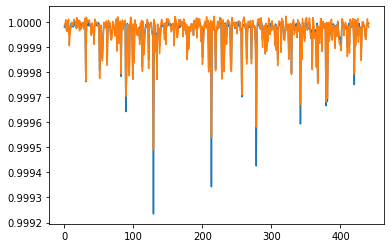

In [121]:
plt.plot(y_test)
plt.plot(y_pred)